In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs

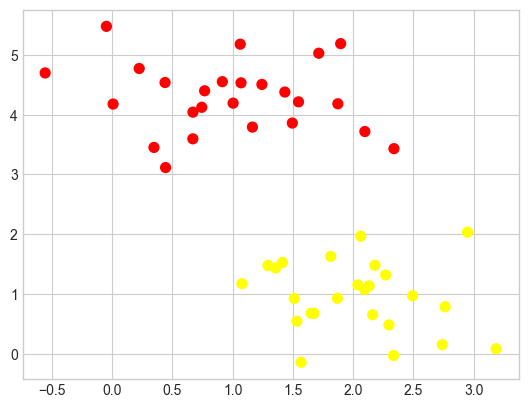

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

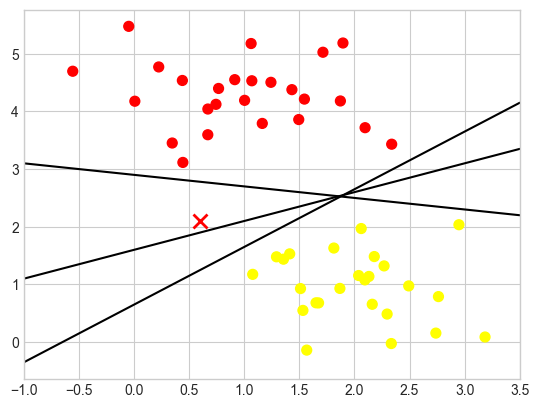

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


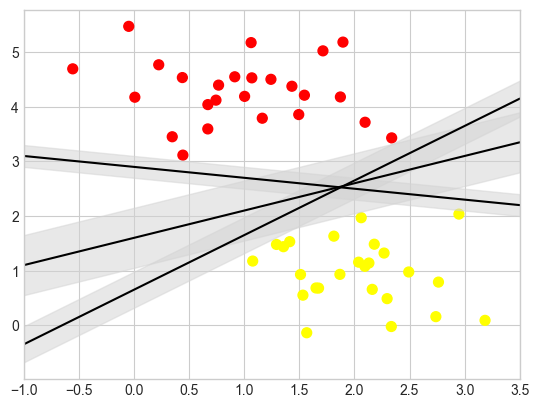

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


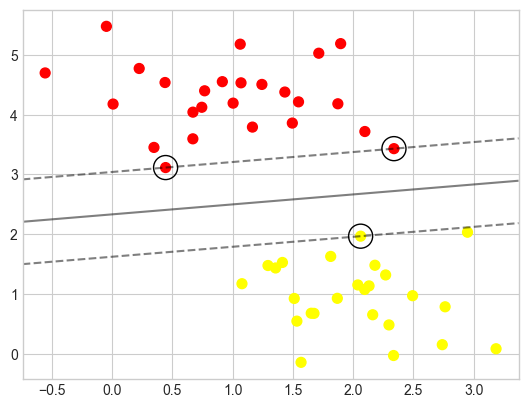

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_

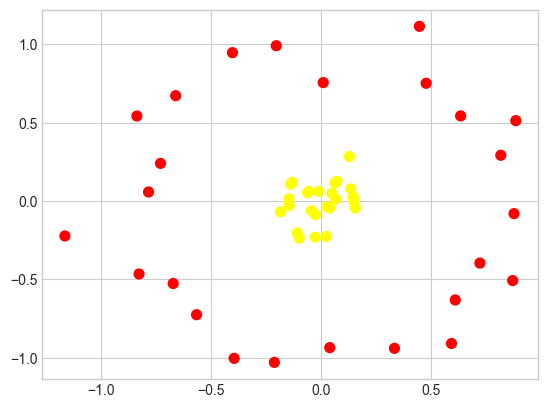

In [6]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

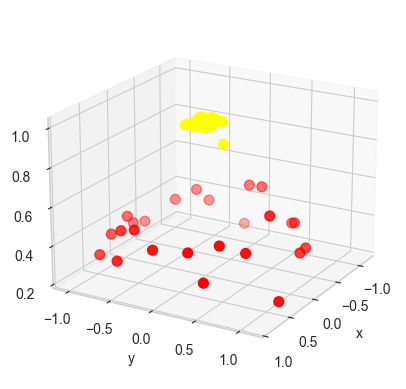

In [7]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');
plt.show()

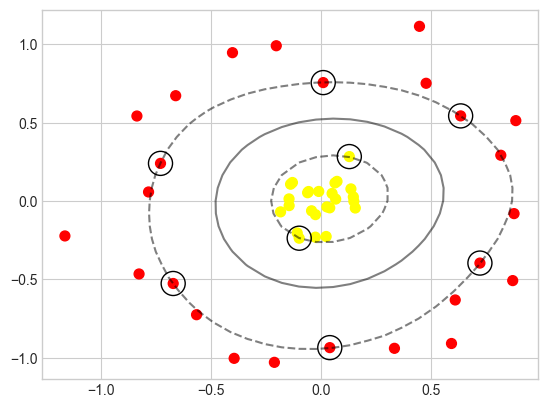

array([[-0.72890682,  0.24016992],
       [ 0.01149263,  0.75536972],
       [-0.67121116, -0.52587196],
       [ 0.04139138, -0.93496843],
       [ 0.63668406,  0.54298526],
       [ 0.72443366, -0.39566665],
       [ 0.13017617,  0.28348614],
       [-0.09783478, -0.23701462]])

In [8]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

# Thuật toán tự viết

In [9]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 15.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 25.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.9 MB/s eta 0:00:00

   ---------------------------------------- 0/5 [pytz]
   ---------------------------------------- 0/5 [pytz]
   -------- ------------------------------- 1/5 [tzdata]
   ---------------- ----------------------- 2/5 [certifi]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [pandas]
   ------------------------ --------------- 3/5 [

In [10]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)
# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

In [26]:
print(X)
print(y)

      variance  skewness  curtosis  entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1367      1
1368      1
1369      1
1370      1
1371      1

[1372 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều dữ liệu
pca_3d = PCA(n_components=3)
X_pca = pca_3d.fit_transform(X_scaled)

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_pca, y.values.ravel(), test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM với kernel tuyến tính
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá kết quả
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác mô hình: {accuracy}")

Độ chính xác mô hình: 0.8909090909090909


Trọng số W: [-0.79456744 -1.41535441 -2.71615165]
Độ lệch b: -0.6468512068904513


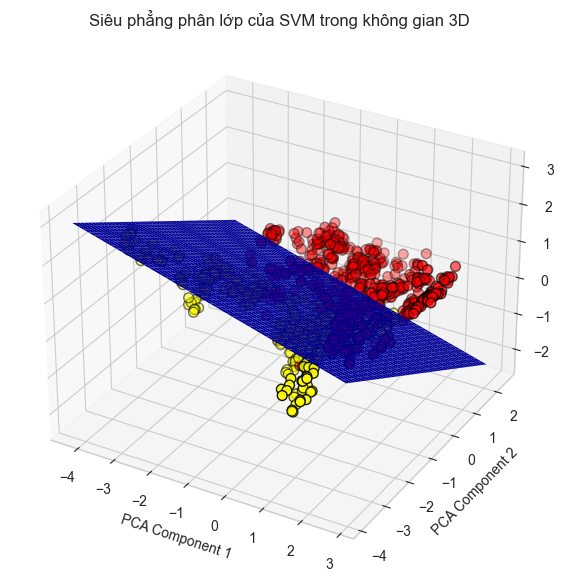

In [ ]:
w = model.coef_[0]
print(f"Trọng số W: {w}")
b = model.intercept_[0]
print(f"Độ lệch b: {b}")
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
y_vals = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = -(w[0] * X_grid + w[1] * Y_grid + b) / w[2]

# Vẽ mặt siêu phẳng
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, color='blue')

# Vẽ dữ liệu
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap="autumn", edgecolors="k")

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Siêu phẳng phân lớp của SVM trong không gian 3D")

plt.show()

Độ chính xác mô hình 2D: 0.730909090909091
Trọng số W 2D: [-0.66700321 -1.06337113]
Độ lệch b 2D: -0.17892029938887435


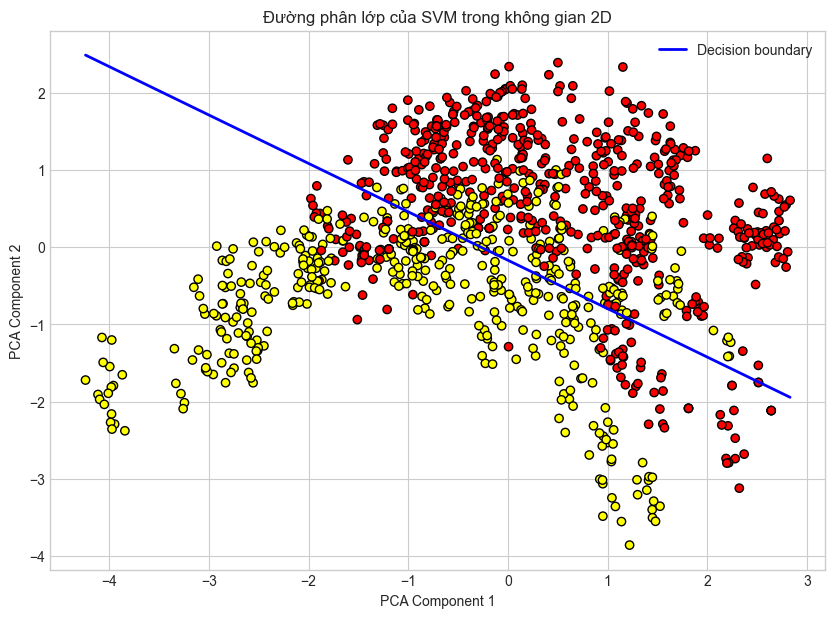

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
# Chia tập dữ liệu
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_pca_2d, y.values.ravel(), test_size=0.2, random_state=42)
# Khởi tạo mô hình SVM với kernel tuyến tính
model_2d = SVC(kernel='linear')
model_2d.fit(X_train_2d, y_train_2d)
# Dự đoán
y_pred_2d = model_2d.predict(X_test_2d)
# Đánh giá kết quả
accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
print(f"Độ chính xác mô hình 2D: {accuracy_2d}")
w_2d = model_2d.coef_[0]
print(f"Trọng số W 2D: {w_2d}")
b_2d = model_2d.intercept_[0]
print(f"Độ lệch b 2D: {b_2d}")
x_vals_2d = np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max())
y_vals_2d = np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max())
X_grid_2d, Y_grid_2d = np.meshgrid(x_vals_2d, y_vals_2d)
# Vẽ đường quyết định (decision boundary) cho SVM 2D
x_vals_2d = np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100)
y_vals_2d = -(w_2d[0] * x_vals_2d + b_2d) / w_2d[1]

fig_2d = plt.figure(figsize=(10, 7))
ax_2d = fig_2d.add_subplot()
ax_2d.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap="autumn", edgecolors="k")
ax_2d.plot(x_vals_2d, y_vals_2d, color='blue', linewidth=2, label='Decision boundary')
ax_2d.set_xlabel("PCA Component 1")
ax_2d.set_ylabel("PCA Component 2")
ax_2d.set_title("Đường phân lớp của SVM trong không gian 2D")
ax_2d.legend()
plt.show()